In [41]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
bos=pd.read_csv('C:/Users/rajka/Downloads/boston.csv')

In [43]:
bos.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PT', 'B', 'LSTAT', 'MV'], dtype=object)

In [44]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [45]:
bos.rename(index=str, columns={"MV": "PRICE"},inplace= 'TRUE')

In [46]:
bos.isnull().any()

CRIM     False
ZN       False
INDUS    False
CHAS     False
NOX      False
RM       False
AGE      False
DIS      False
RAD      False
TAX      False
PT       False
B        False
LSTAT    False
PRICE    False
dtype: bool

In [47]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [48]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print('estimated intercept coefficint', lm.intercept_)

estimated intercept coefficint 36.4594914578


In [50]:
print('no. of coefficient' , len(lm.coef_))

no. of coefficient 13


In [51]:
list(zip(X.columns,lm.coef_))

[('CRIM', -0.10801135349181173),
 ('ZN', 0.046420455913895542),
 ('INDUS', 0.020558676115598778),
 ('CHAS', 2.6867338920506296),
 ('NOX', -17.766614854274849),
 ('RM', 3.8098649756017715),
 ('AGE', 0.00069222392627166229),
 ('DIS', -1.475566792626577),
 ('RAD', 0.30604951516041412),
 ('TAX', -0.012334593208123579),
 ('PT', -0.95274725606642818),
 ('B', 0.0093116834053419417),
 ('LSTAT', -0.5247583971973544)]

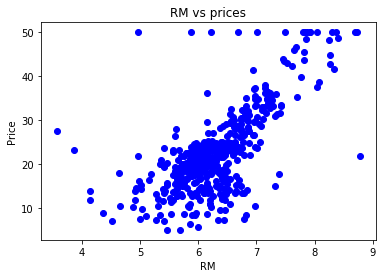

In [52]:
plt.scatter(bos.RM,bos.PRICE,c='b')
plt.xlabel("RM")
plt.ylabel("Price")
plt.title("RM vs prices")
plt.show()

## MSE

In [53]:
mse =np.mean((bos.PRICE-lm.predict(X))**2)
print(mse)

21.894831188831237


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,bos.PRICE,test_size = 0.3,random_state=43)
lm.fit(X_train,y_train)
lm.predict(X_train)
lm.predict(X_test)

array([ 23.49502244,  16.64276161,  20.89086257,  34.10893075,
        16.99684469,  12.37651608,  13.23003219,  25.1042028 ,
        22.52995848,   7.3557165 ,  27.92138255,  26.67641733,
        16.5561419 ,  20.90705186,  22.21161719,  12.02679561,
        31.82627421,  33.10034726,  14.52291179,  41.17452286,
        20.72250115,   8.22482968,  21.00552941,  31.66548226,
         6.38626101,  25.47222069,  20.14001207,  19.75581064,
        19.23289122,   6.55277567,  21.47501152,  23.54992897,
        15.54426662,   8.87460032,  24.3497272 ,  18.87328938,
        16.18536414,  20.56369615,  28.67823071,  26.60884895,
        20.72441747,   5.28560224,  25.65967476,  17.89886558,
        38.73954301,  18.18256401,  24.13572688,  22.31279577,
        35.48734835,  18.08937764,  27.95173905,  37.94797643,
        35.0815283 ,  22.03440291,  11.6560116 ,  38.38853418,
        33.85752288,  25.83804   ,  28.78726522,  28.76691096,
        22.65628524,  14.08134322,  25.95352085,  27.75

In [55]:
print ('MSE with Y_train:', np.mean((y_train-lm.predict(X_train)) ** 2))
print ('MSE with X_test, Y_test:', np.mean((y_test-lm.predict(X_test)) ** 2))

MSE with Y_train: 21.42833253117588
MSE with X_test, Y_test: 25.408891623109284
